In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings

#=================================================
# Modify paths to point to output files
#=================================================
# Case name (Straight coast)
case_straight = 'Straight Coast'

# path to ocean_annual file
path_year_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/800yr/26000101.ocean_annual.nc'
dy_straight = xr.open_dataset(path_year_straight, decode_times=True)

# path to ocean_month file
path_month_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/800yr/26000101.ocean_month.nc'
dm_straight = xr.open_dataset(path_month_straight, decode_times=True)

# path to ice_month file
path_month_straight = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/800yr/26000101.ice_month.nc'
di_straight = xr.open_dataset(path_month_straight, decode_times=True)


# Case name (Both Coast)
case_both = 'Both Coast'

# path to ocean_annual file
path_year_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/800yr/26000101.ocean_annual.nc'
dy_both = xr.open_dataset(path_year_both, decode_times=True)

# path to ocean_month file
path_month_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/800yr/26000101.ocean_month.nc'
dm_both = xr.open_dataset(path_month_both, decode_times=True)

# path to ice_month file
path_month_both = '/data/sragen/aquaplanet/MASTERS/both_coast/run/DATA/800yr/26000101.ice_month.nc'
di_both = xr.open_dataset(path_month_both, decode_times=True)


# Case name (Wide Straight)
case_wide = 'Wide Straight'

# path to ocean_annual file
path_year_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/200yr/20000101.ocean_annual.nc'
dy_wide = xr.open_dataset(path_year_wide, decode_times=True)

# path to ocean_month file
path_month_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/200yr/20000101.ocean_month.nc'
dm_wide = xr.open_dataset(path_month_wide, decode_times=True)

# path to ice_month file
path_month_wide = '/data/sragen/aquaplanet/MASTERS/wide_straight/run/DATA/200yr/20000101.ice_month.nc'
di_wide = xr.open_dataset(path_month_wide, decode_times=True)


# Case name (America Coast)
case_am = 'America Coast'

# path to ocean_annual file
path_year_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_am = xr.open_dataset(path_year_am, decode_times=True)

# path to ocean_month file
path_month_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ocean_month.nc'
dm_am = xr.open_dataset(path_month_am, decode_times=True)

# path to ice_month file
path_month_am = '/data/sragen/aquaplanet/MASTERS/am_coast/run/DATA/600yr/24000101.ice_month.nc'
di_am = xr.open_dataset(path_month_am, decode_times=True)


# Case name (Africa Coast)
case_af = 'Africa Coast'

# path to ocean_annual file
path_year_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/600yr/24000101.ocean_annual.nc'
dy_af = xr.open_dataset(path_year_af, decode_times=True)

# path to ocean_month file
path_month_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/600yr/24000101.ocean_month.nc'
dm_af = xr.open_dataset(path_month_af, decode_times=True)

# path to ice_month file
path_month_af = '/data/sragen/aquaplanet/MASTERS/af_coast/run/DATA/600yr/24000101.ice_month.nc'
di_af = xr.open_dataset(path_month_af, decode_times=True)


#=================================================
# Ignore runtime warnings: mean of empty slice
#=================================================
warnings.filterwarnings("ignore", message="Mean of empty slice")

#=================================================
# Modify latitudes to point to western and eastern
# boundaries of small basin and northern extent of SO.
# Comment out for AQUA and RIDGE cases. 
#=================================================
x_west = np.where(dy_both['xh']==211)[0][0]
x_east = np.where(dy_both['xh']==351)[0][0]
y = np.where(dy_both['yq']==-35)[0][0]
y_south = np.where(dy_both['yq']==-71)[0][0]
y_north = np.where(dy_both['yq']==71)[0][0]

/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


In [2]:
def inferred_fw_transport(fw_fluxes):
    ae = 6.373E6 
    from scipy import integrate
    lat = fw_fluxes.yh
    norm = np.cos(np.deg2rad(lat)) / np.cos(np.deg2rad(lat)).mean(dim='yh')
    imbalance = (fw_fluxes * norm).mean(dim='yh')
    balanced = fw_fluxes - imbalance
    lat_rad = np.deg2rad(lat)
    coslat = np.cos(lat_rad)
    field = coslat*np.nansum(balanced, axis=1)
    field[np.isnan(field)] = 0
    latax = field.get_axis_num('yh')
    integral = integrate.cumtrapz(field[::-1], x=lat_rad, initial=0., axis=latax)
    result = (2/180 * np.math.pi * ae**2 * integral)
    result_xarray = field.copy()
    result_xarray.values = result[::-1]
    return result_xarray


def plot_salinity(net_fw, dm, case, lim=1e-4):
    b = np.linspace(-lim, lim, 21, endpoint=True)
    t = np.linspace(-lim, lim, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dm['xh'], dm['yh'], net_fw, b, 
                 cmap='BrBG', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[kg m$^{-2}$ s$^{-1}$]', fontsize=14)
    plt.title('{} Net Freshwater Fluxes'.format(case), fontsize=16)
    # plt.savefig(fig_path+'PRCmE_vprec_contour.png')
    plt.show()
    return


def plot_salinity_diff(net_fw_case1, net_fw_case2, dm, case1, case2, lim=6e-5):
    b = np.linspace(-lim, lim, 21, endpoint=True)
    t = np.linspace(-lim, lim, 11, endpoint=True)
    fig = plt.figure(figsize=(14, 6))
    ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson(central_longitude=180.0))
    plt.contourf(dm['xh'], dm['yh'], net_fw_case1-net_fw_case2, b, 
             cmap='BrBG', extend='both',  transform=ccrs.PlateCarree())
    cbar = plt.colorbar(ticks=t, boundaries=t, spacing='uniform', extend='both')
    cbar.ax.set_ylabel('[kg m$^{-2}$ s$^{-1}$]', fontsize=14)
    plt.title('{} - {} Net FW Fluxes'.format(case1, case2), fontsize=16)
    # plt.savefig(fig_path+'PRCmE_vprec_contour.png')
    plt.show()
    return


def smooth(x,window_len=11,window='hanning'):
    """smooth the data using a window with requested size.
    
    This method is based on the convolution of a scaled window with the signal.
    The signal is prepared by introducing reflected copies of the signal 
    (with the window size) in both ends so that transient parts are minimized
    in the begining and end part of the output signal.
    
    input:
        x: the input signal 
        window_len: the dimension of the smoothing window; should be an odd integer
        window: the type of window from 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'
            flat window will produce a moving average smoothing.

    output:
        the smoothed signal
    """

    if x.ndim != 1:
        raise ValueError("smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise ValueError("Input vector needs to be bigger than window size.")

    if window_len<3:
        return x

    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise ValueError("Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")

    s=np.r_[x[len(x):0:-1],x,x[-2:-len(x)-1:-1]]  # Changed this line

    if window == 'flat': #moving average
        w=np.ones(window_len,'d')
    else:
        w=eval('np.'+window+'(window_len)')

    y=np.convolve(w/w.sum(),s,mode='valid')
    y = y[len(x)-2:-len(x)+2]      # Changed this line too. Hope it works
    return y  



In [3]:
SALTF_straight = di_straight['SALTF'].rename({'xT':'xh', 'yT':'yh'})
SALTF_both = di_both['SALTF'].rename({'xT':'xh', 'yT':'yh'})
SALTF_wide = di_wide['SALTF'].rename({'xT':'xh', 'yT':'yh'})
SALTF_am = di_am['SALTF'].rename({'xT':'xh', 'yT':'yh'})
SALTF_af = di_af['SALTF'].rename({'xT':'xh', 'yT':'yh'})

net_salt_straight = (dm_straight['PRCmE'][-361:,:,:].mean(dim='time') + 
            dm_straight['vprec'][-361:,:,:].mean(dim='time') - 
            SALTF_straight[-361:,:,:].mean(dim='time'))
net_salt_both = (dm_both['PRCmE'][-361:,:,:].mean(dim='time') + 
            dm_both['vprec'][-361:,:,:].mean(dim='time') - 
            SALTF_both[-361:,:,:].mean(dim='time'))
net_salt_wide = (dm_wide['PRCmE'][-361:,:,:].mean(dim='time') + 
            dm_wide['vprec'][-361:,:,:].mean(dim='time') - 
            SALTF_wide[-361:,:,:].mean(dim='time'))
net_salt_am = (dm_am['PRCmE'][-300:,:,:].mean(dim='time') + 
            dm_am['vprec'][-300:,:,:].mean(dim='time') - 
            SALTF_am[-300:,:,:].mean(dim='time'))
net_salt_af = (dm_af['PRCmE'][-361:,:,:].mean(dim='time') + 
            dm_af['vprec'][-361:,:,:].mean(dim='time') - 
            SALTF_af[-361:,:,:].mean(dim='time'))


In [4]:
print(di_af['SALTF'])
print(dm_straight['PRCmE'])
print(dm_straight['vprec'])
print(net_salt_straight.shape)

<xarray.DataArray 'SALTF' (time: 1200, yT: 81, xT: 180)>
[17496000 values with dtype=float32]
Coordinates:
  * xT       (xT) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * yT       (yT) float64 -80.0 -78.0 -76.0 -74.0 -72.0 ... 74.0 76.0 78.0 80.0
  * time     (time) object 2400-01-16 12:00:00 ... 2499-12-16 12:00:00
Attributes:
    long_name:      ice to ocean salt flux
    units:          kg/(m^2*s)
    cell_methods:   time: mean
    time_avg_info:  average_T1,average_T2,average_DT
<xarray.DataArray 'PRCmE' (time: 1200, yh: 81, xh: 180)>
[17496000 values with dtype=float32]
Coordinates:
  * xh       (xh) float64 1.0 3.0 5.0 7.0 9.0 ... 351.0 353.0 355.0 357.0 359.0
  * yh       (yh) float64 -80.0 -78.0 -76.0 -74.0 -72.0 ... 74.0 76.0 78.0 80.0
  * time     (time) object 2600-01-16 12:00:00 ... 2699-12-16 12:00:00
Attributes:
    long_name:      Net surface water flux (precip+melt+lrunoff+ice calving-e...
    units:          kg m-2 s-1
    cell_methods:   area:mean 

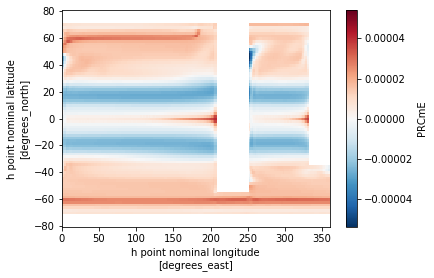

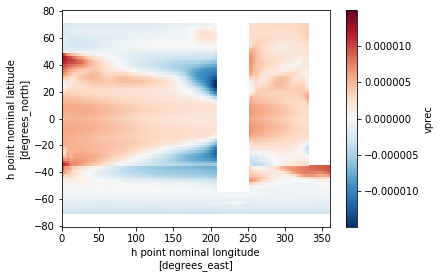

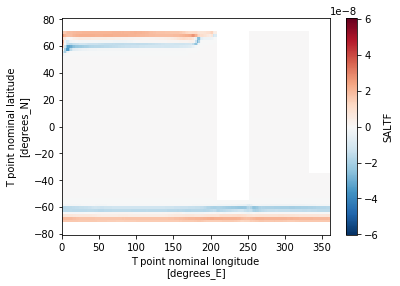

In [5]:
dm_straight['PRCmE'][-361:,:,:].mean(dim='time').plot(); plt.show()
dm_straight['vprec'][-361:,:,:].mean(dim='time').plot(); plt.show()
di_straight['SALTF'][-361:,:,:].mean(dim='time').plot(); plt.show()

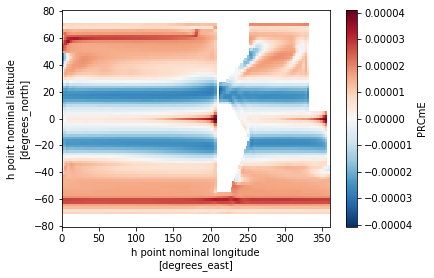

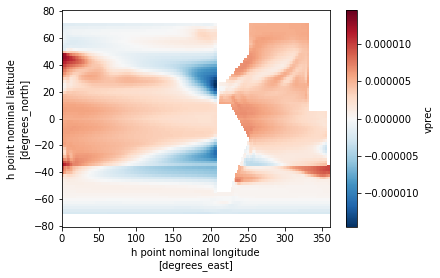

In [6]:
dm_both['PRCmE'][-361:,:,:].mean(dim='time').plot(); plt.show()
dm_both['vprec'][-361:,:,:].mean(dim='time').plot(); plt.show()

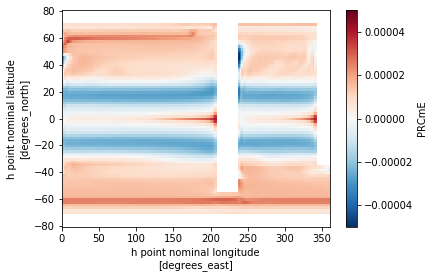

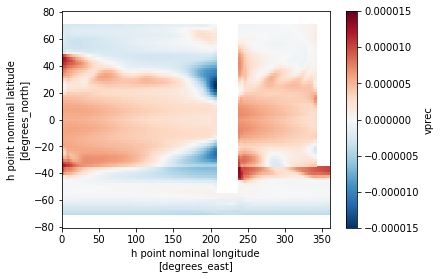

In [7]:
dm_wide['PRCmE'][-361:,:,:].mean(dim='time').plot(); plt.show()
dm_wide['vprec'][-361:,:,:].mean(dim='time').plot(); plt.show()

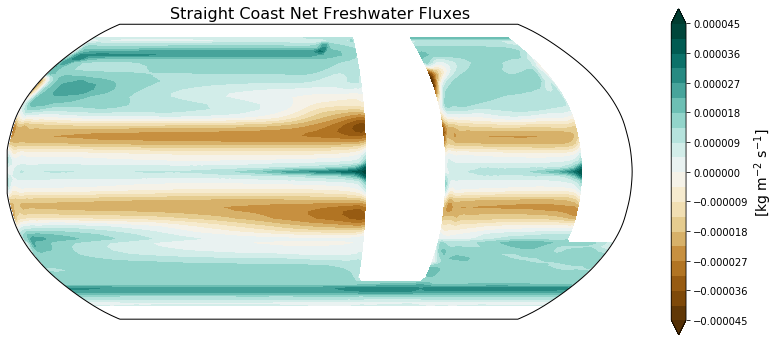

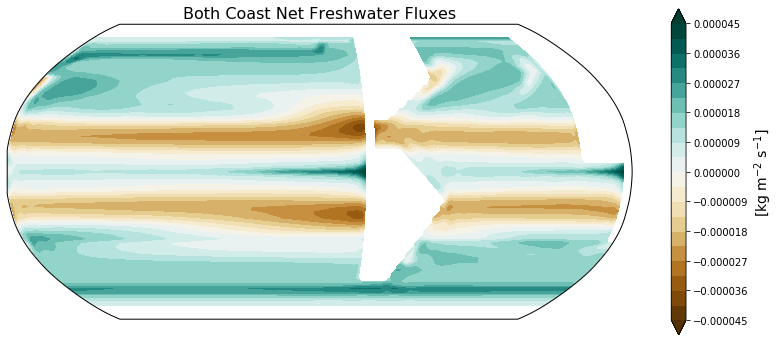

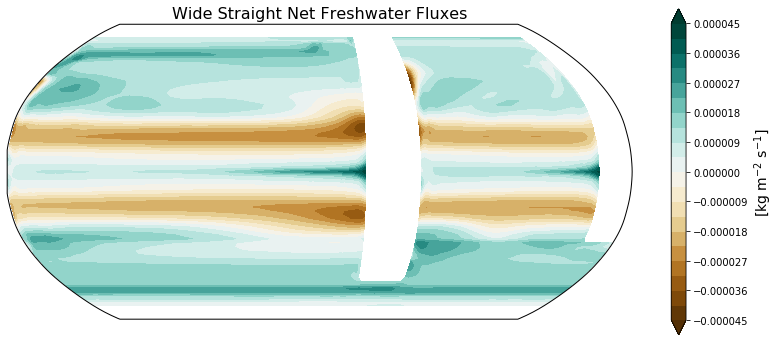

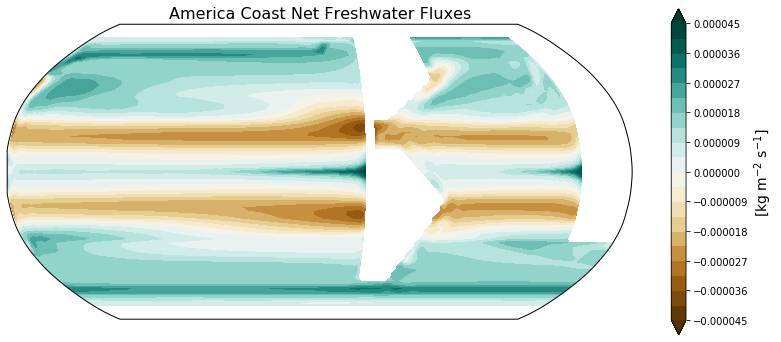

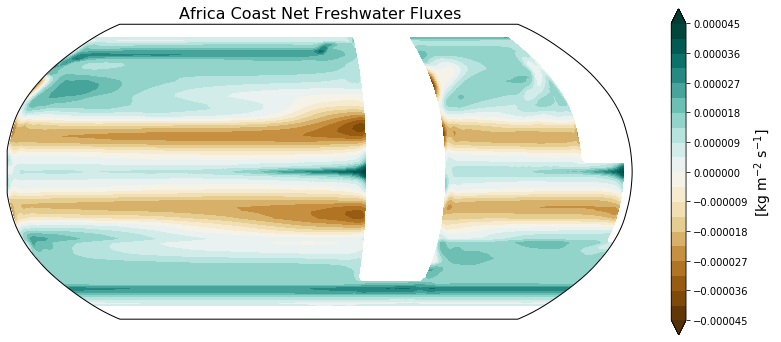

In [8]:
plot_salinity(net_salt_straight, dm_straight, case_straight, lim=4.5e-5)

plot_salinity(net_salt_both, dm_both, case_both, lim=4.5e-5)

plot_salinity(net_salt_wide, dm_wide, case_wide, lim=4.5e-5)

plot_salinity(net_salt_am, dm_am, case_am, lim=4.5e-5)

plot_salinity(net_salt_af, dm_af, case_af, lim=4.5e-5)

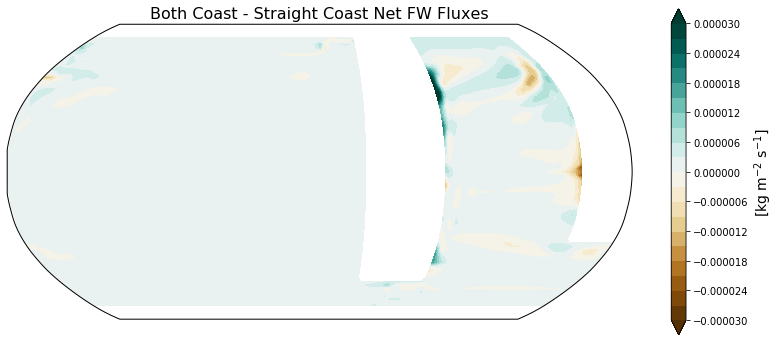

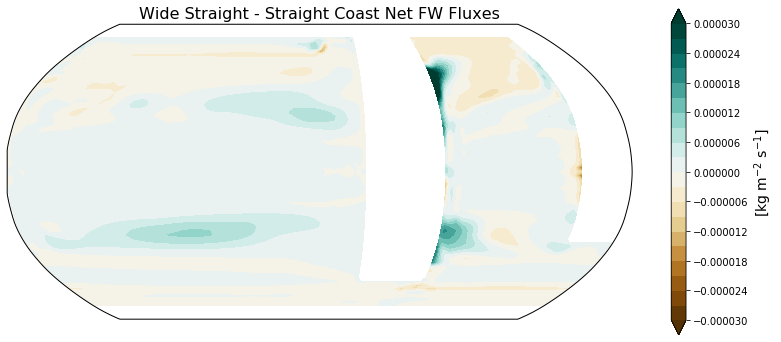

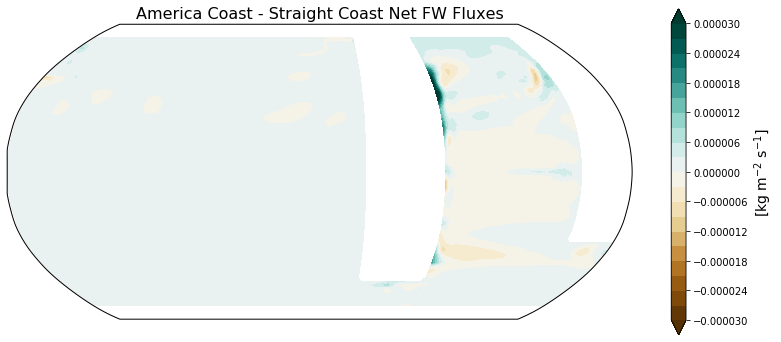

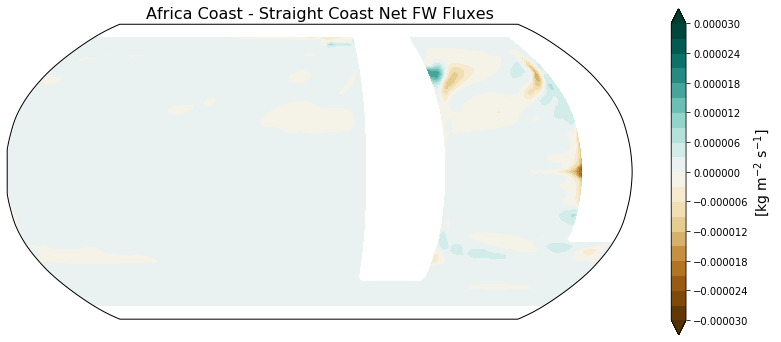

In [9]:
plot_salinity_diff(net_salt_both, net_salt_straight, dm_both, case_both, case_straight, lim=3e-5)

plot_salinity_diff(net_salt_wide, net_salt_straight, dm_straight, case_wide, case_straight, lim=3e-5)

plot_salinity_diff(net_salt_am, net_salt_straight, dm_am, case_am, case_straight, lim=3e-5)

plot_salinity_diff(net_salt_af, net_salt_straight, dm_af, case_af, case_straight, lim=3e-5)

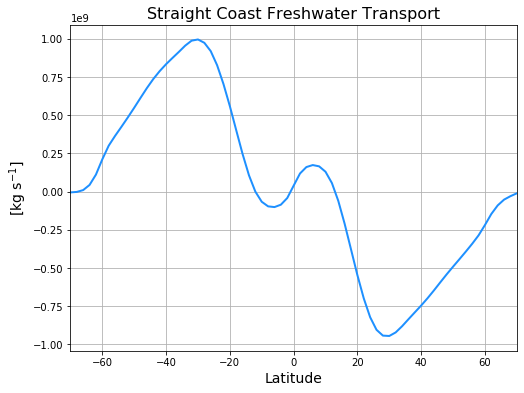

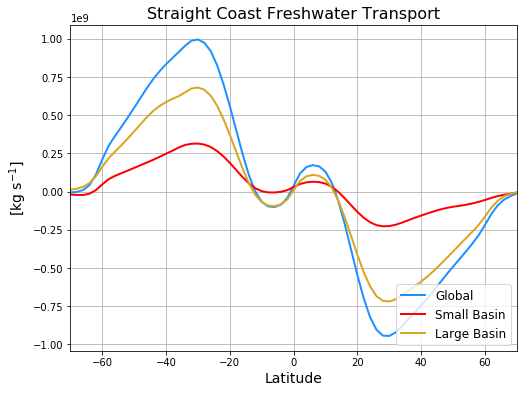

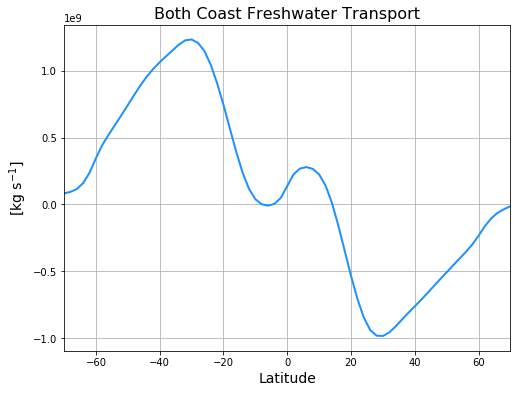

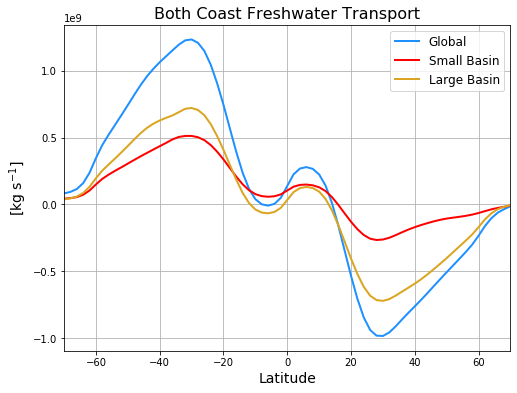

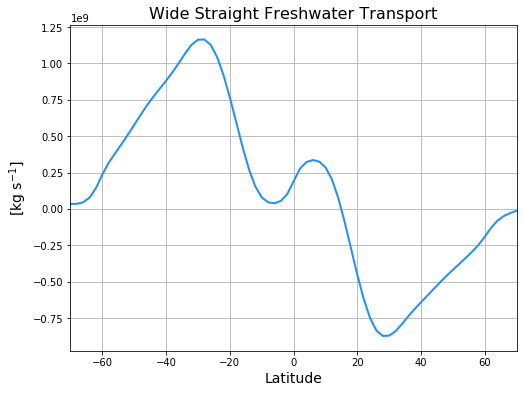

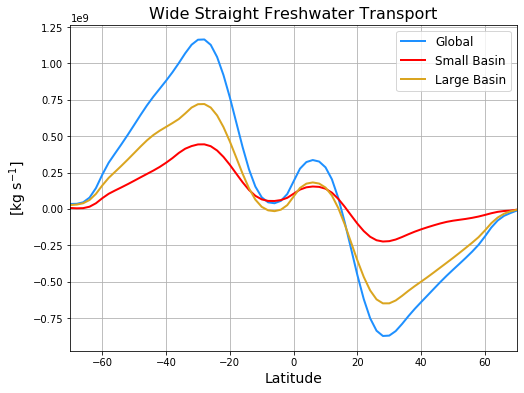

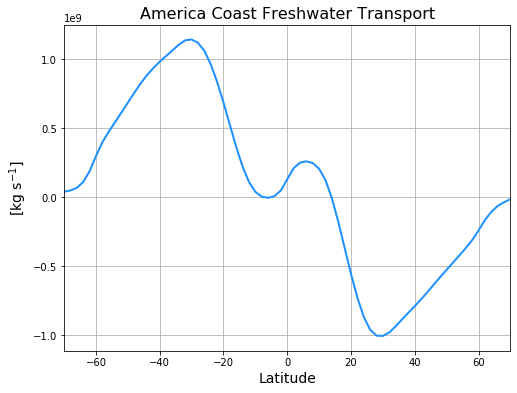

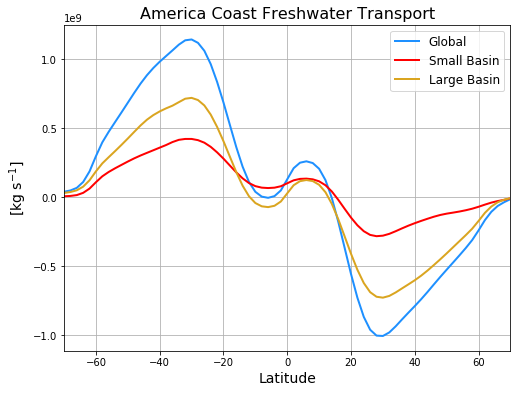

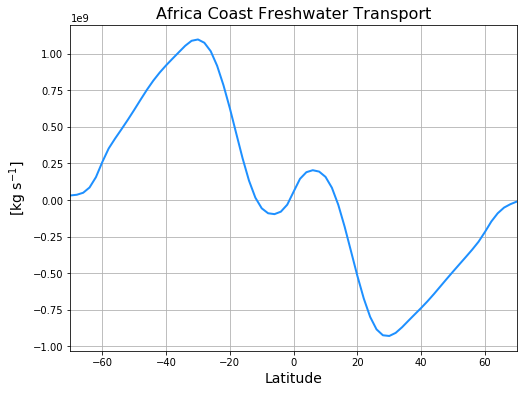

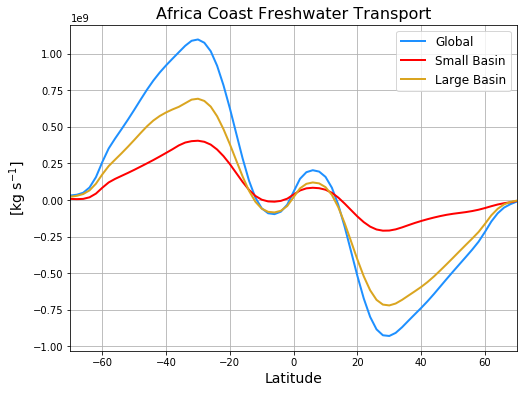

In [10]:
# Freshwater Transport inferred from surface fluxes

OST_straight = inferred_fw_transport(-net_salt_straight)
OST_small_straight = inferred_fw_transport(-net_salt_straight.sel(xh=slice(211,360)))
OST_large_straight = inferred_fw_transport(-net_salt_straight.sel(xh=slice(0, 211)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_straight['yh'], OST_straight, color='dodgerblue', linewidth=2, label=case_straight)
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_straight['yh'], OST_straight, color='dodgerblue', linewidth=2, label='Global')
ax.plot(dm_straight['yh'], OST_small_straight, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_straight['yh'], OST_large_straight, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12, loc='lower right')
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

OST_both = inferred_fw_transport(-net_salt_both)
OST_small_both = inferred_fw_transport(-net_salt_both.sel(xh=slice(211,360)))
OST_large_both = inferred_fw_transport(-net_salt_both.sel(xh=slice(0, 211)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_both['yh'], OST_both, color='dodgerblue', linewidth=2, label=case_both)
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_both), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_both['yh'], OST_both, color='dodgerblue', linewidth=2, label='Global')
ax.plot(dm_both['yh'], OST_small_both, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_both['yh'], OST_large_both, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_both), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

OST_wide = inferred_fw_transport(-net_salt_wide)
OST_small_wide = inferred_fw_transport(-net_salt_wide.sel(xh=slice(211,360)))
OST_large_wide = inferred_fw_transport(-net_salt_wide.sel(xh=slice(0, 211)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_wide['yh'], OST_wide, color='dodgerblue', linewidth=2, label=case_wide)
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_wide), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_wide['yh'], OST_wide, color='dodgerblue', linewidth=2, label='Global')
ax.plot(dm_wide['yh'], OST_small_wide, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_wide['yh'], OST_large_wide, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_wide), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

OST_am = inferred_fw_transport(-net_salt_am)
OST_small_am = inferred_fw_transport(-net_salt_am.sel(xh=slice(211,360)))
OST_large_am = inferred_fw_transport(-net_salt_am.sel(xh=slice(0, 211)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_am['yh'], OST_am, color='dodgerblue', linewidth=2, label=case_am)
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_am), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_am['yh'], OST_am, color='dodgerblue', linewidth=2, label='Global')
ax.plot(dm_am['yh'], OST_small_am, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_am['yh'], OST_large_am, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_am), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

OST_af = inferred_fw_transport(-net_salt_af)
OST_small_af = inferred_fw_transport(-net_salt_af.sel(xh=slice(211,360)))
OST_large_af = inferred_fw_transport(-net_salt_af.sel(xh=slice(0, 211)))

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_af['yh'], OST_af, color='dodgerblue', linewidth=2, label=case_af)
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_af), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_af['yh'], OST_af, color='dodgerblue', linewidth=2, label='Global')
ax.plot(dm_af['yh'], OST_small_af, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_af['yh'], OST_large_af, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-70,70)
plt.title('{} Freshwater Transport'.format(case_af), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()


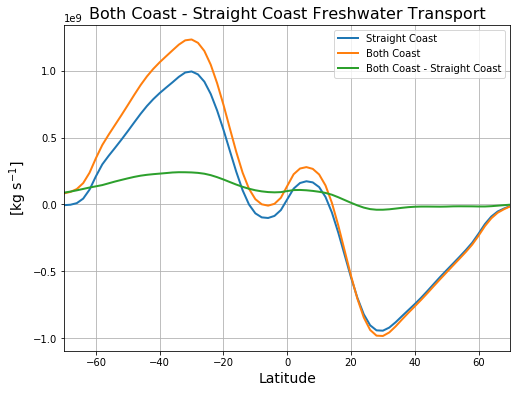

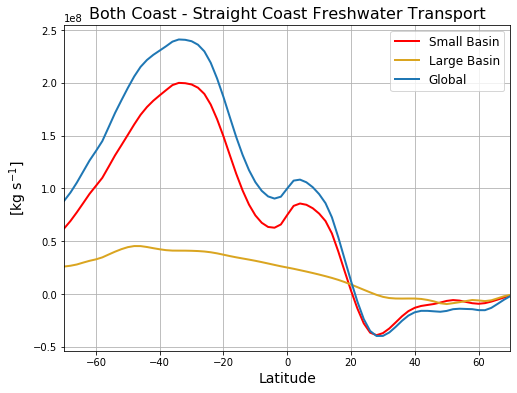

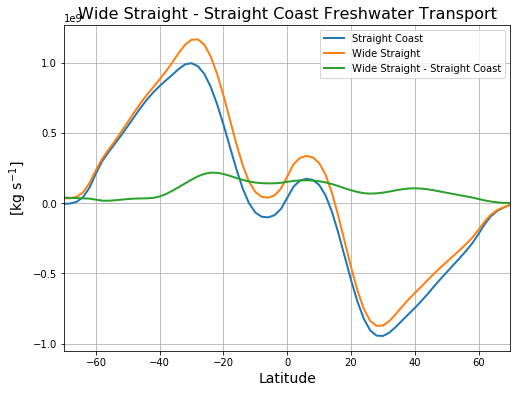

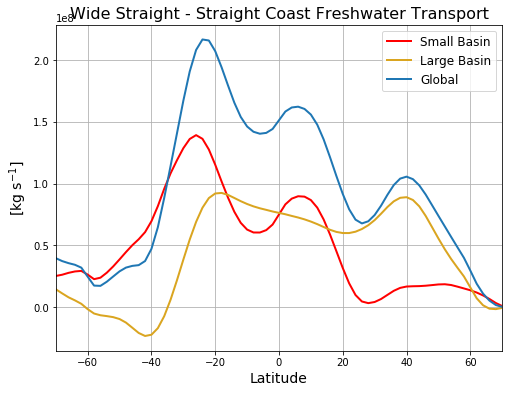

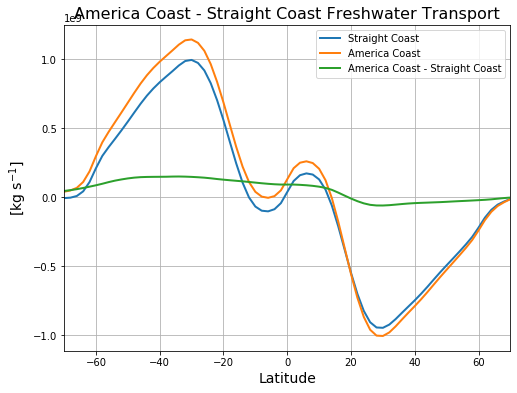

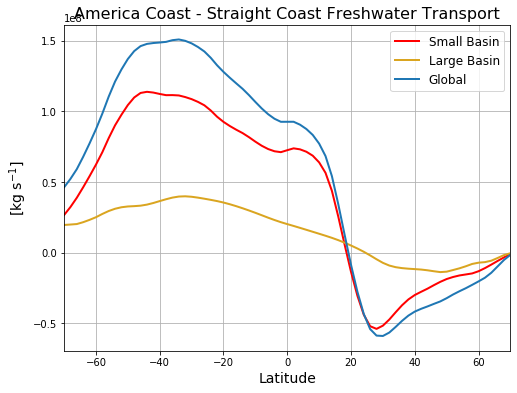

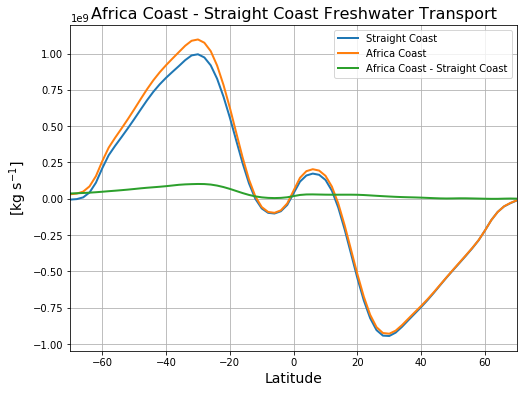

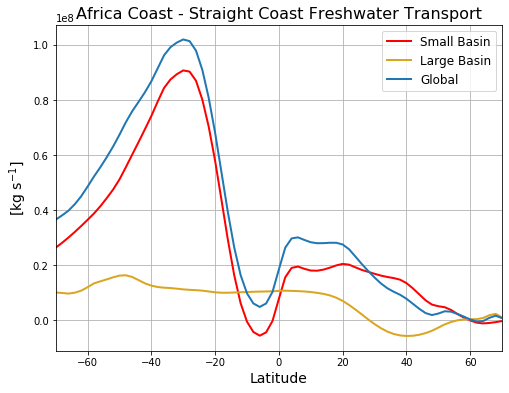

In [11]:
# Difference Plots of Freshwater transport inferred from surface fluxes

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_both['yh'], OST_straight, linewidth=2, label=case_straight)
ax.plot(dm_both['yh'], OST_both, linewidth=2, label=case_both)
ax.plot(dm_both['yh'], OST_both - OST_straight, linewidth=2, label='{} - {}'.format(case_both, case_straight))
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_both, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_both['yh'], OST_small_both-OST_small_straight, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_both['yh'], OST_large_both-OST_large_straight, color='goldenrod', linewidth=2, label='Large Basin')
ax.plot(dm_both['yh'], OST_both-OST_straight, linewidth=2, label='Global')
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_both, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_wide['yh'], OST_straight, linewidth=2, label=case_straight)
ax.plot(dm_wide['yh'], OST_wide, linewidth=2, label=case_wide)
ax.plot(dm_wide['yh'], OST_wide - OST_straight, linewidth=2, label='{} - {}'.format(case_wide, case_straight))
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_wide, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_wide['yh'], OST_small_wide-OST_small_straight, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_wide['yh'], OST_large_wide-OST_large_straight, color='goldenrod', linewidth=2, label='Large Basin')
ax.plot(dm_wide['yh'], OST_wide-OST_straight, linewidth=2, label='Global')
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_wide, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_am['yh'], OST_straight, linewidth=2, label=case_straight)
ax.plot(dm_am['yh'], OST_am, linewidth=2, label=case_am)
ax.plot(dm_am['yh'], OST_am - OST_straight, linewidth=2, label='{} - {}'.format(case_am, case_straight))
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_am, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_am['yh'], OST_small_am-OST_small_straight, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_am['yh'], OST_large_am-OST_large_straight, color='goldenrod', linewidth=2, label='Large Basin')
ax.plot(dm_am['yh'], OST_am-OST_straight, linewidth=2, label='Global')
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_am, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_af['yh'], OST_straight, linewidth=2, label=case_straight)
ax.plot(dm_af['yh'], OST_af, linewidth=2, label=case_af)
ax.plot(dm_af['yh'], OST_af - OST_straight, linewidth=2, label='{} - {}'.format(case_af, case_straight))
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_af, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_af['yh'], OST_small_af-OST_small_straight, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_af['yh'], OST_large_af-OST_large_straight, color='goldenrod', linewidth=2, label='Large Basin')
ax.plot(dm_af['yh'], OST_af-OST_straight, linewidth=2, label='Global')
plt.xlim(-70,70)
plt.title('{} - {} Freshwater Transport'.format(case_af, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

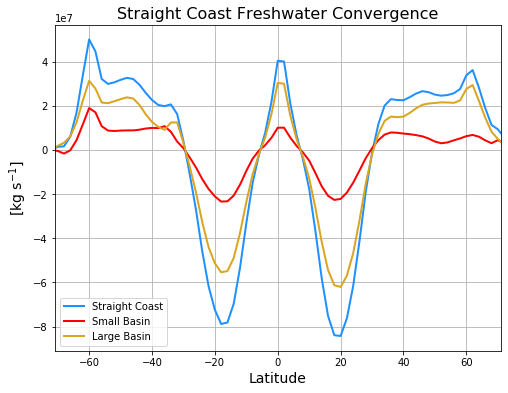

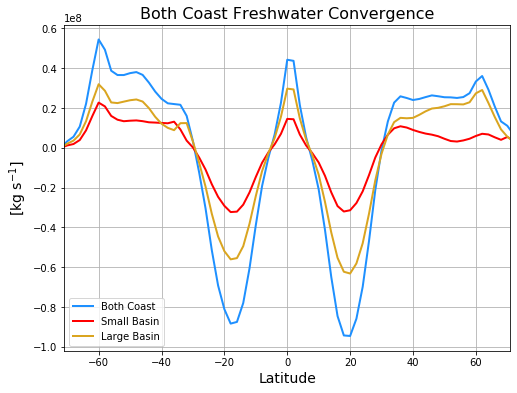

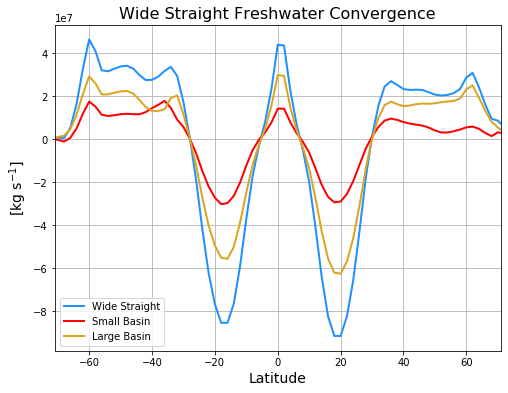

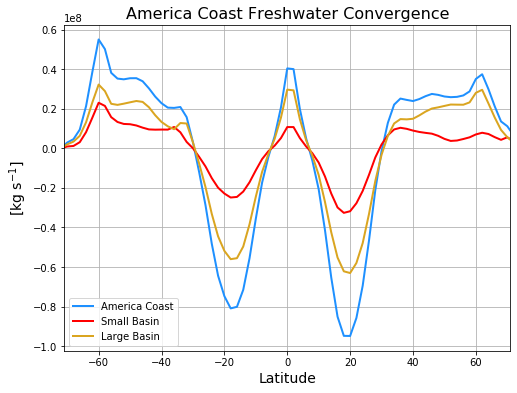

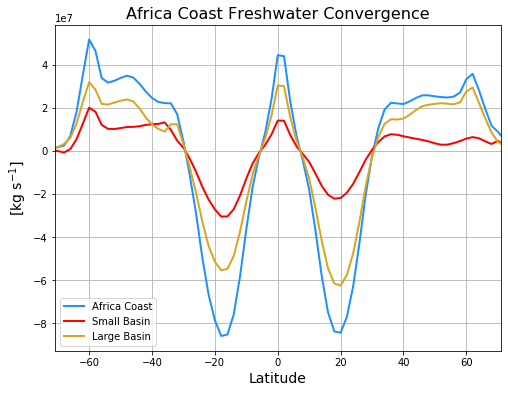

In [12]:
# Freshwater convergence (d/dy of Freshwater transport) into both basins

# Straight Coast
dOST_straight = OST_straight.diff('yh')
dOST_small_straight = OST_small_straight.diff('yh')
dOST_large_straight = OST_large_straight.diff('yh')
dy = dm_straight.yh.diff('yh')

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), dOST_straight/dy, color='dodgerblue', 
        linewidth=2, label=case_straight)
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), dOST_small_straight/dy, color='red', 
        linewidth=2, label='Small Basin')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), dOST_large_straight/dy, color='goldenrod', 
        linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} Freshwater Convergence'.format(case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# Both Coast
dOST_both = OST_both.diff('yh')
dOST_small_both = OST_small_both.diff('yh')
dOST_large_both = OST_large_both.diff('yh')
dy = dm_both.yh.diff('yh')

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_both['yh'].sel(yh=slice(-78,80)), dOST_both/dy, color='dodgerblue', 
        linewidth=2, label=case_both)
ax.plot(dm_both['yh'].sel(yh=slice(-78,80)), dOST_small_both/dy, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_both['yh'].sel(yh=slice(-78,80)), dOST_large_both/dy, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} Freshwater Convergence'.format(case_both), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# Wide Coast
dOST_wide = OST_wide.diff('yh')
dOST_small_wide = OST_small_wide.diff('yh')
dOST_large_wide = OST_large_wide.diff('yh')
dy = dm_wide.yh.diff('yh')

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_wide['yh'].sel(yh=slice(-78,80)), dOST_wide/dy, color='dodgerblue', 
        linewidth=2, label=case_wide)
ax.plot(dm_wide['yh'].sel(yh=slice(-78,80)), dOST_small_wide/dy, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_wide['yh'].sel(yh=slice(-78,80)), dOST_large_wide/dy, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} Freshwater Convergence'.format(case_wide), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# Am Coast
dOST_am = OST_am.diff('yh')
dOST_small_am = OST_small_am.diff('yh')
dOST_large_am = OST_large_am.diff('yh')
dy = dm_am.yh.diff('yh')

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_am['yh'].sel(yh=slice(-78,80)), dOST_am/dy, color='dodgerblue', 
        linewidth=2, label=case_am)
ax.plot(dm_am['yh'].sel(yh=slice(-78,80)), dOST_small_am/dy, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_am['yh'].sel(yh=slice(-78,80)), dOST_large_am/dy, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} Freshwater Convergence'.format(case_am), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# Af Coast
dOST_af = OST_af.diff('yh')
dOST_small_af = OST_small_af.diff('yh')
dOST_large_af = OST_large_af.diff('yh')
dy = dm_af.yh.diff('yh')

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_af['yh'].sel(yh=slice(-78,80)), dOST_af/dy, color='dodgerblue', 
        linewidth=2, label=case_af)
ax.plot(dm_af['yh'].sel(yh=slice(-78,80)), dOST_small_af/dy, color='red', linewidth=2, label='Small Basin')
ax.plot(dm_af['yh'].sel(yh=slice(-78,80)), dOST_large_af/dy, color='goldenrod', linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} Freshwater Convergence'.format(case_af), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

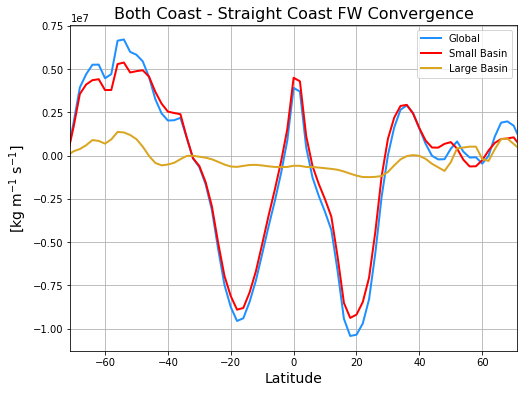

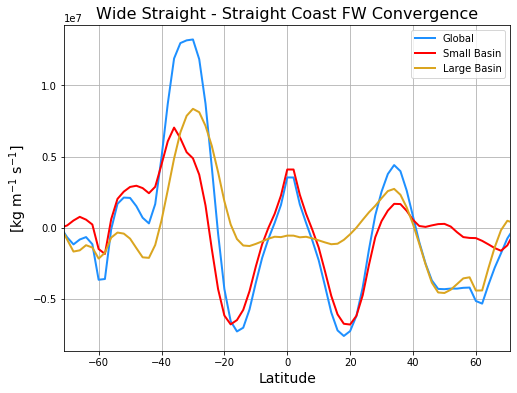

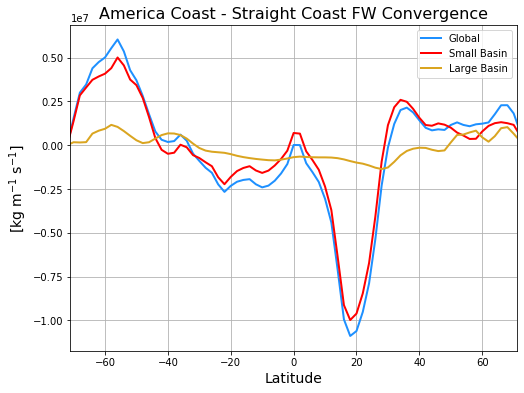

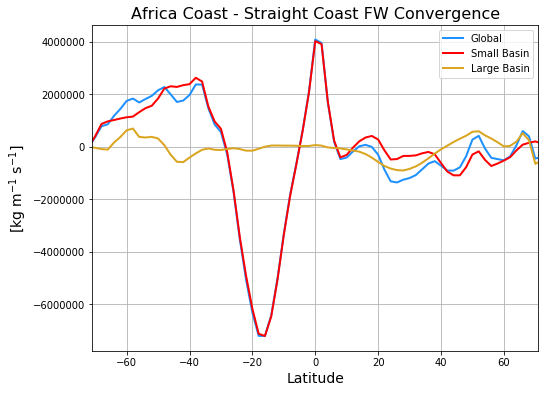

In [13]:
# Difference plots of Freshwater convergence (d/dy of Freshwater transport) into both basins

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_both-dOST_straight)/dy, color='dodgerblue', 
        linewidth=2, label='Global')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_small_both-dOST_small_straight)/dy, color='red', 
        linewidth=2, label='Small Basin')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_large_both-dOST_large_straight)/dy, color='goldenrod', 
        linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} - {} FW Convergence'.format(case_both, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg m$^{-1}$ s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_wide-dOST_straight)/dy, color='dodgerblue', 
        linewidth=2, label='Global')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_small_wide-dOST_small_straight)/dy, color='red', 
        linewidth=2, label='Small Basin')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_large_wide-dOST_large_straight)/dy, color='goldenrod', 
        linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} - {} FW Convergence'.format(case_wide, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg m$^{-1}$ s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_am-dOST_straight)/dy, color='dodgerblue', 
        linewidth=2, label='Global')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_small_am-dOST_small_straight)/dy, color='red', 
        linewidth=2, label='Small Basin')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_large_am-dOST_large_straight)/dy, color='goldenrod', 
        linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} - {} FW Convergence'.format(case_am, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg m$^{-1}$ s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_af-dOST_straight)/dy, color='dodgerblue', 
        linewidth=2, label='Global')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_small_af-dOST_small_straight)/dy, color='red', 
        linewidth=2, label='Small Basin')
ax.plot(dm_straight['yh'].sel(yh=slice(-78,80)), (dOST_large_af-dOST_large_straight)/dy, color='goldenrod', 
        linewidth=2, label='Large Basin')
plt.xlim(-71,71)
plt.title('{} - {} FW Convergence'.format(case_af, case_straight), fontsize=16)
plt.xlabel('Latitude', fontsize=14), plt.ylabel('[kg m$^{-1}$ s$^{-1}$]', fontsize=14)
plt.grid(); plt.legend()
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

In [14]:
# Time series of salt convergence (d/dy of salt transport) into both basins
net_salt_straight = (dm_straight['PRCmE'][-361:,:,:].mean(dim='time') + 
            dm_straight['vprec'][-361:,:,:].mean(dim='time') - 
            SALTF_straight[-361:,:,:].mean(dim='time'))

OST_straight = inferred_fw_transport(net_salt_straight)


/home/sragen/.conda/envs/aqua/lib/python3.7/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


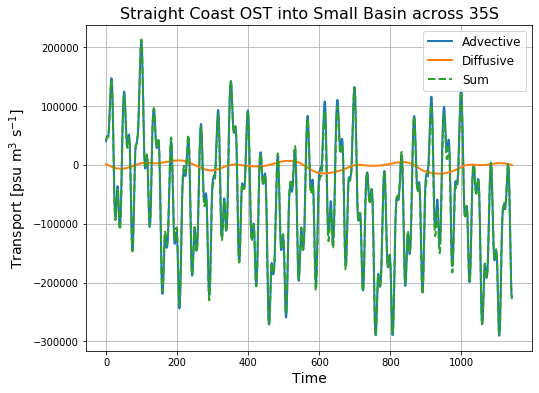

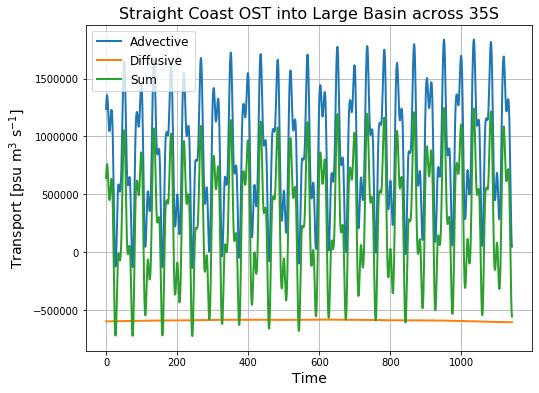

In [15]:
# Straight Coast salt transport (from model diagnostics) into both basins time series
# small basin (choose lon=211:351, lat=-35)
path_month = '/data/sragen/aquaplanet/MASTERS/straight_coast/run/DATA/600yr/24000101.ocean_month.nc'
dm_straight = xr.open_dataset(path_month, decode_times=True)
window_len=60

Sady_straight = dm_straight.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='zl').sum(dim='xh')
# Sady_straight = dm_straight.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Sdiffy_straight = dm_straight.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Ssum_straight = Sady_straight + Sdiffy_straight

Sady_straight_smooth = smooth(Sady_straight, window_len)
Sdiffy_straight_smooth = smooth(Sdiffy_straight, window_len)
Ssum_straight_smooth_small = smooth(Ssum_straight, window_len)

fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(Ssum_straight, linewidth=2, label='Sum unsmoothed')
ax.plot(Sady_straight_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_straight_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_straight_smooth_small, '--', linewidth=2, label='Sum')
plt.title('Straight Coast OST into Small Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# large basin
Sady_straight = dm_straight.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='zl').sum(dim='xh')
# Sady_straight = dm_straight.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Sdiffy_straight = dm_straight.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Ssum_straight = Sady_straight + Sdiffy_straight

Sady_straight_smooth = smooth(Sady_straight, window_len)
Sdiffy_straight_smooth = smooth(Sdiffy_straight, window_len)
Ssum_straight_smooth_large = smooth(Ssum_straight, window_len)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Sady_straight_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_straight_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_straight_smooth_large, linewidth=2, label='Sum')
plt.title('Straight Coast OST into Large Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

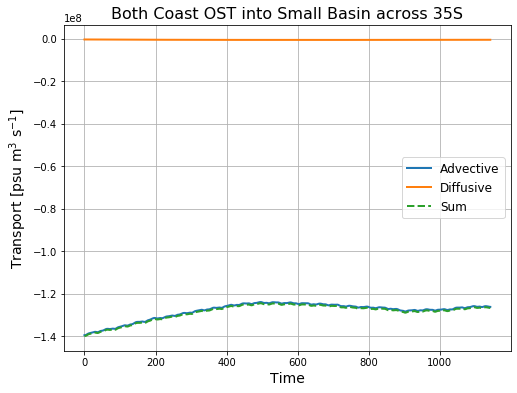

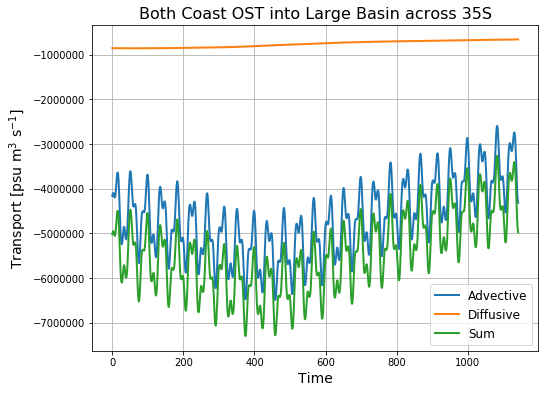

In [16]:
# Both Coast salt transport (from model diagnostics) into both basins time series
# small basin (choose lon=211:351, lat=-35)
window_len=60

Sady_both = dm_both.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='zl').sum(dim='xh')
# Sady_both = dm_both.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Sdiffy_both = dm_both.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Ssum_both = Sady_both + Sdiffy_both

Sady_both_smooth = smooth(Sady_both, window_len)
Sdiffy_both_smooth = smooth(Sdiffy_both, window_len)
Ssum_both_smooth_small = smooth(Ssum_both, window_len)

fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(Ssum_both, linewidth=2, label='Sum unsmoothed')
ax.plot(Sady_both_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_both_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_both_smooth_small, '--', linewidth=2, label='Sum')
plt.title('Both Coast OST into Small Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# large basin
Sady_both = dm_both.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='zl').sum(dim='xh')
# Sady_both = dm_both.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Sdiffy_both = dm_both.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Ssum_both = Sady_both + Sdiffy_both

Sady_both_smooth = smooth(Sady_both, window_len)
Sdiffy_both_smooth = smooth(Sdiffy_both, window_len)
Ssum_both_smooth_large = smooth(Ssum_both, window_len)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Sady_both_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_both_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_both_smooth_large, linewidth=2, label='Sum')
plt.title('Both Coast OST into Large Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

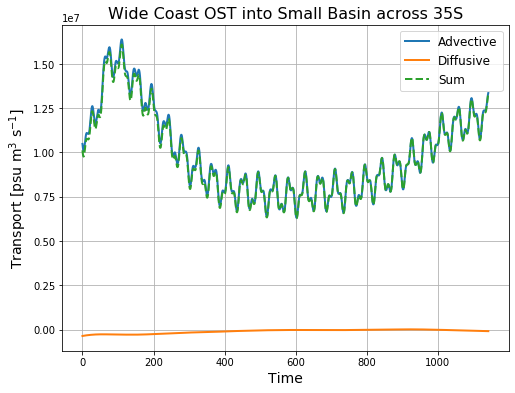

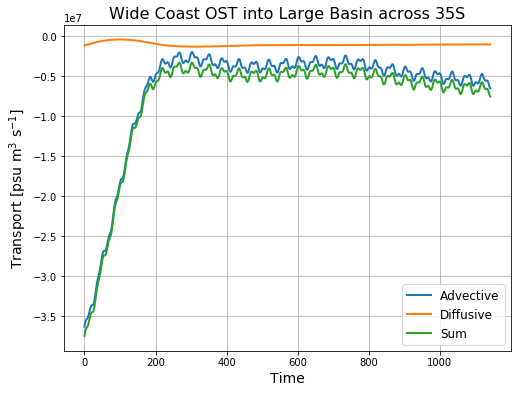

In [17]:
# Wide Coast salt transport (from model diagnostics) into both basins time series
# small basin (choose lon=211:351, lat=-35)
window_len=60

Sady_wide = dm_wide.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='zl').sum(dim='xh')
# Sady_wide = dm_wide.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Sdiffy_wide = dm_wide.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Ssum_wide = Sady_wide + Sdiffy_wide

Sady_wide_smooth = smooth(Sady_wide, window_len)
Sdiffy_wide_smooth = smooth(Sdiffy_wide, window_len)
Ssum_wide_smooth_small = smooth(Ssum_wide, window_len)

fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(Ssum_wide, linewidth=2, label='Sum unsmoothed')
ax.plot(Sady_wide_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_wide_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_wide_smooth_small, '--', linewidth=2, label='Sum')
plt.title('Wide Coast OST into Small Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# large basin
Sady_wide = dm_wide.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='zl').sum(dim='xh')
# Sady_wide = dm_wide.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Sdiffy_wide = dm_wide.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Ssum_wide = Sady_wide + Sdiffy_wide

Sady_wide_smooth = smooth(Sady_wide, window_len)
Sdiffy_wide_smooth = smooth(Sdiffy_wide, window_len)
Ssum_wide_smooth_large = smooth(Ssum_wide, window_len)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Sady_wide_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_wide_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_wide_smooth_large, linewidth=2, label='Sum')
plt.title('Wide Coast OST into Large Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

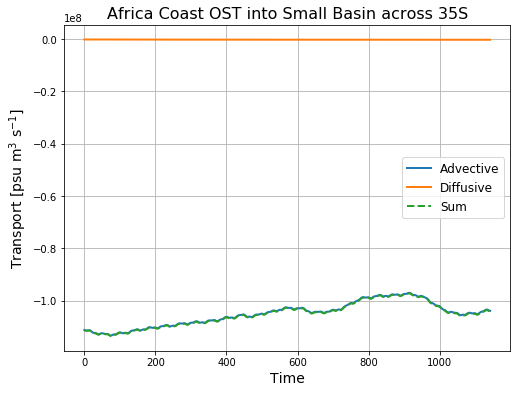

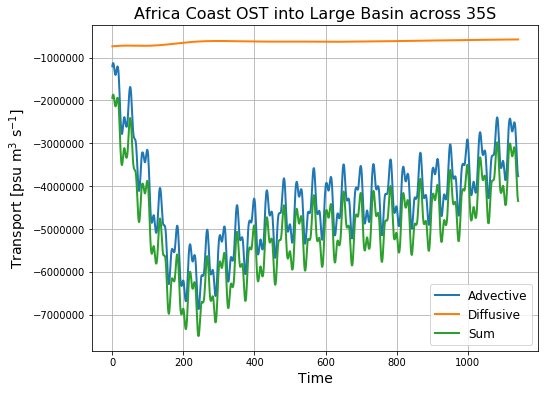

In [18]:
# Africa Coast salt transport (from model diagnostics) into both basins time series
# small basin (choose lon=211:351, lat=-35)
window_len=60

Sady_af = dm_af.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='zl').sum(dim='xh')
# Sady_af = dm_af.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Sdiffy_af = dm_af.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Ssum_af = Sady_af + Sdiffy_af

Sady_af_smooth = smooth(Sady_af, window_len)
Sdiffy_af_smooth = smooth(Sdiffy_af, window_len)
Ssum_af_smooth_small = smooth(Ssum_af, window_len)

fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(Ssum_af, linewidth=2, label='Sum unsmoothed')
ax.plot(Sady_af_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_af_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_af_smooth_small, '--', linewidth=2, label='Sum')
plt.title('Africa Coast OST into Small Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# large basin
Sady_af = dm_af.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='zl').sum(dim='xh')
# Sady_af = dm_af.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Sdiffy_af = dm_af.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Ssum_af = Sady_af + Sdiffy_af

Sady_af_smooth = smooth(Sady_af, window_len)
Sdiffy_af_smooth = smooth(Sdiffy_af, window_len)
Ssum_af_smooth_large = smooth(Ssum_af, window_len)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Sady_af_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_af_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_af_smooth_large, linewidth=2, label='Sum')
plt.title('Africa Coast OST into Large Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

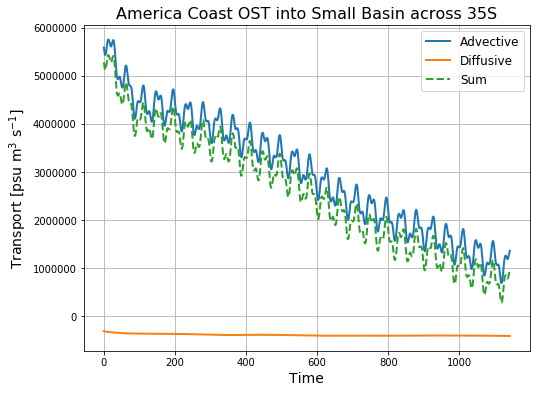

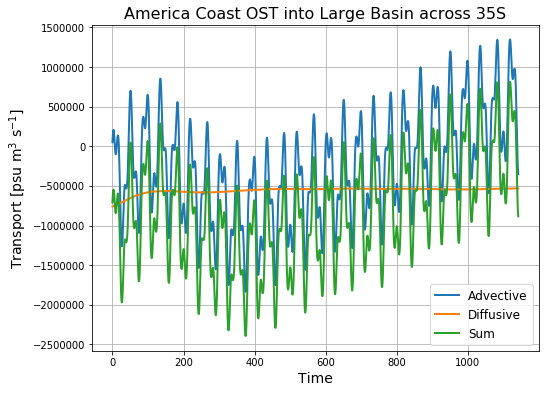

In [19]:
# America Coast salt transport (from model diagnostics) into both basins time series
# small basin (choose lon=211:351, lat=-35)
window_len=60

Sady_am = dm_am.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='zl').sum(dim='xh')
# Sady_am = dm_am.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Sdiffy_am = dm_am.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(210,350)).sum(dim='xh')
Ssum_am = Sady_am + Sdiffy_am

Sady_am_smooth = smooth(Sady_am, window_len)
Sdiffy_am_smooth = smooth(Sdiffy_am, window_len)
Ssum_am_smooth_small = smooth(Ssum_am, window_len)

fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(Ssum_am, linewidth=2, label='Sum unsmoothed')
ax.plot(Sady_am_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_am_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_am_smooth_small, '--', linewidth=2, label='Sum')
plt.title('America Coast OST into Small Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

# large basin
Sady_am = dm_am.S_ady.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='zl').sum(dim='xh')
# Sady_am = dm_am.S_ady_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Sdiffy_am = dm_am.S_diffy_2d.sel(yq=-35, method='nearest').sel(xh=slice(0,210)).sum(dim='xh')
Ssum_am = Sady_am + Sdiffy_am

Sady_am_smooth = smooth(Sady_am, window_len)
Sdiffy_am_smooth = smooth(Sdiffy_am, window_len)
Ssum_am_smooth_large = smooth(Ssum_am, window_len)

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Sady_am_smooth, linewidth=2, label='Advective')
ax.plot(Sdiffy_am_smooth, linewidth=2, label='Diffusive')
ax.plot(Ssum_am_smooth_large, linewidth=2, label='Sum')
plt.title('America Coast OST into Large Basin across 35S', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

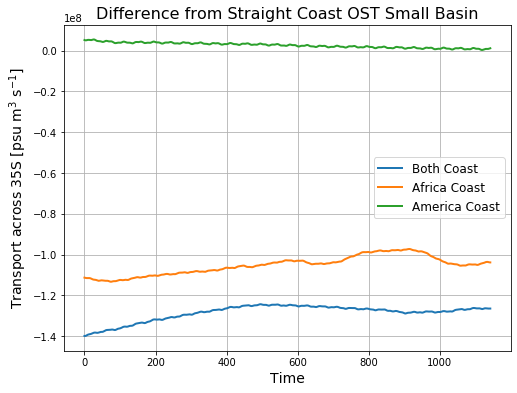

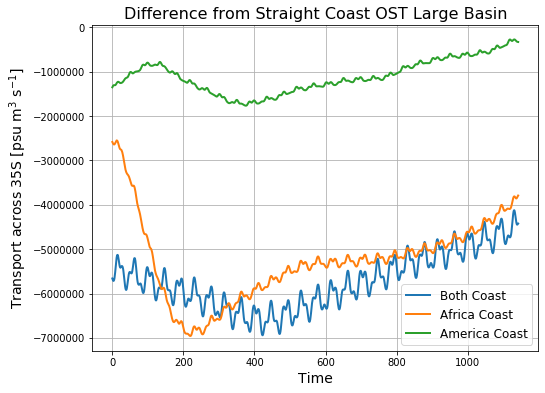

In [20]:
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Ssum_both_smooth_small-Ssum_straight_smooth_small, linewidth=2, label=case_both)
ax.plot(Ssum_af_smooth_small-Ssum_straight_smooth_small, linewidth=2, label=case_af)
ax.plot(Ssum_am_smooth_small-Ssum_straight_smooth_small, linewidth=2, label=case_am)
plt.title('Difference from Straight Coast OST Small Basin', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport across 35S [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(Ssum_both_smooth_large-Ssum_straight_smooth_large, linewidth=2, label=case_both)
ax.plot(Ssum_af_smooth_large-Ssum_straight_smooth_large, linewidth=2, label=case_af)
ax.plot(Ssum_am_smooth_large-Ssum_straight_smooth_large, linewidth=2, label=case_am)
plt.title('Difference from Straight Coast OST Large Basin', fontsize=16)
plt.xlabel('Time', fontsize=14), plt.ylabel('Transport across 35S [psu m$^3$ s$^{-1}$]', fontsize=14)
plt.grid()
plt.legend(fontsize=12)
# plt.savefig(fig_path+'OHT_inferred.png')
plt.show()

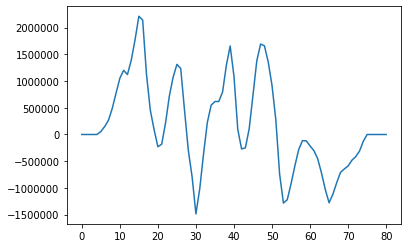

In [21]:
def calculate_OST(S_ady_2d, S_diffy_2d):
    sady_zonal = S_ady_2d.mean(dim='time').sum(dim='xh')
    sdiffy_zonal = S_diffy_2d.mean(dim='time').sum(dim='xh')
    OST = sady_zonal + sdiffy_zonal
    return OST



OST_straight = calculate_OST(dm_straight.S_ady.sum(dim='zl'), dm_straight.S_diffy_2d)

plt.plot(OST_straight); plt.show()

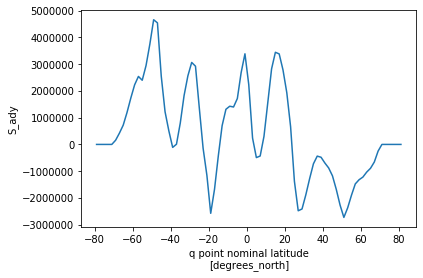

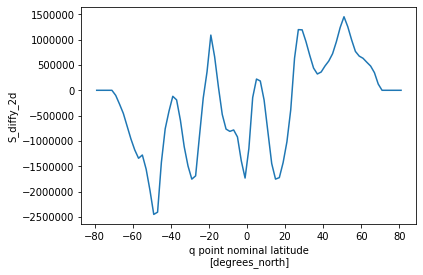

In [22]:
dm_straight.S_ady.sum(dim='zl').mean(dim='time').sum(dim='xh').plot(); plt.show()
dm_straight.S_diffy_2d.mean(dim='time').sum(dim='xh').plot(); plt.show()